# **PROJECT 2 - Introduction to Machine Learning and Artificial Intelligence**

Here is the interactive code for the second project. This project deals with the implementation of machine learning algorithms as diagnostic tools in the field of medical science. The dataset used in this project is from UCI ML Breast Cancer Wisconsin (Diagnostic) and is available through the University of Wisconsin-Madison ftp server.

# **Medical Diagnosis**
In this project, we will study a machine learning classification application using a logistic regression algorithm (as a baseline) and a neural network algorithm in the medical science field.

Artificial intelligence and particularly machine learning algorithms have many medical applications such as disease diagnosis and treatment. The development of machine learning in healthcare can improve the efficiency and accuracy of medical treatments and significantly reduce the cost of such procedures.

In this project, the diagnosis of breast cancer into malignant and benign tumours will be performed. To do so, a dataset is employed with several numeric features and attributes of the tissue. These features are computed from a digitized medical image of a breast mass.

***There are some optional hints available for each question at the end of this page.***

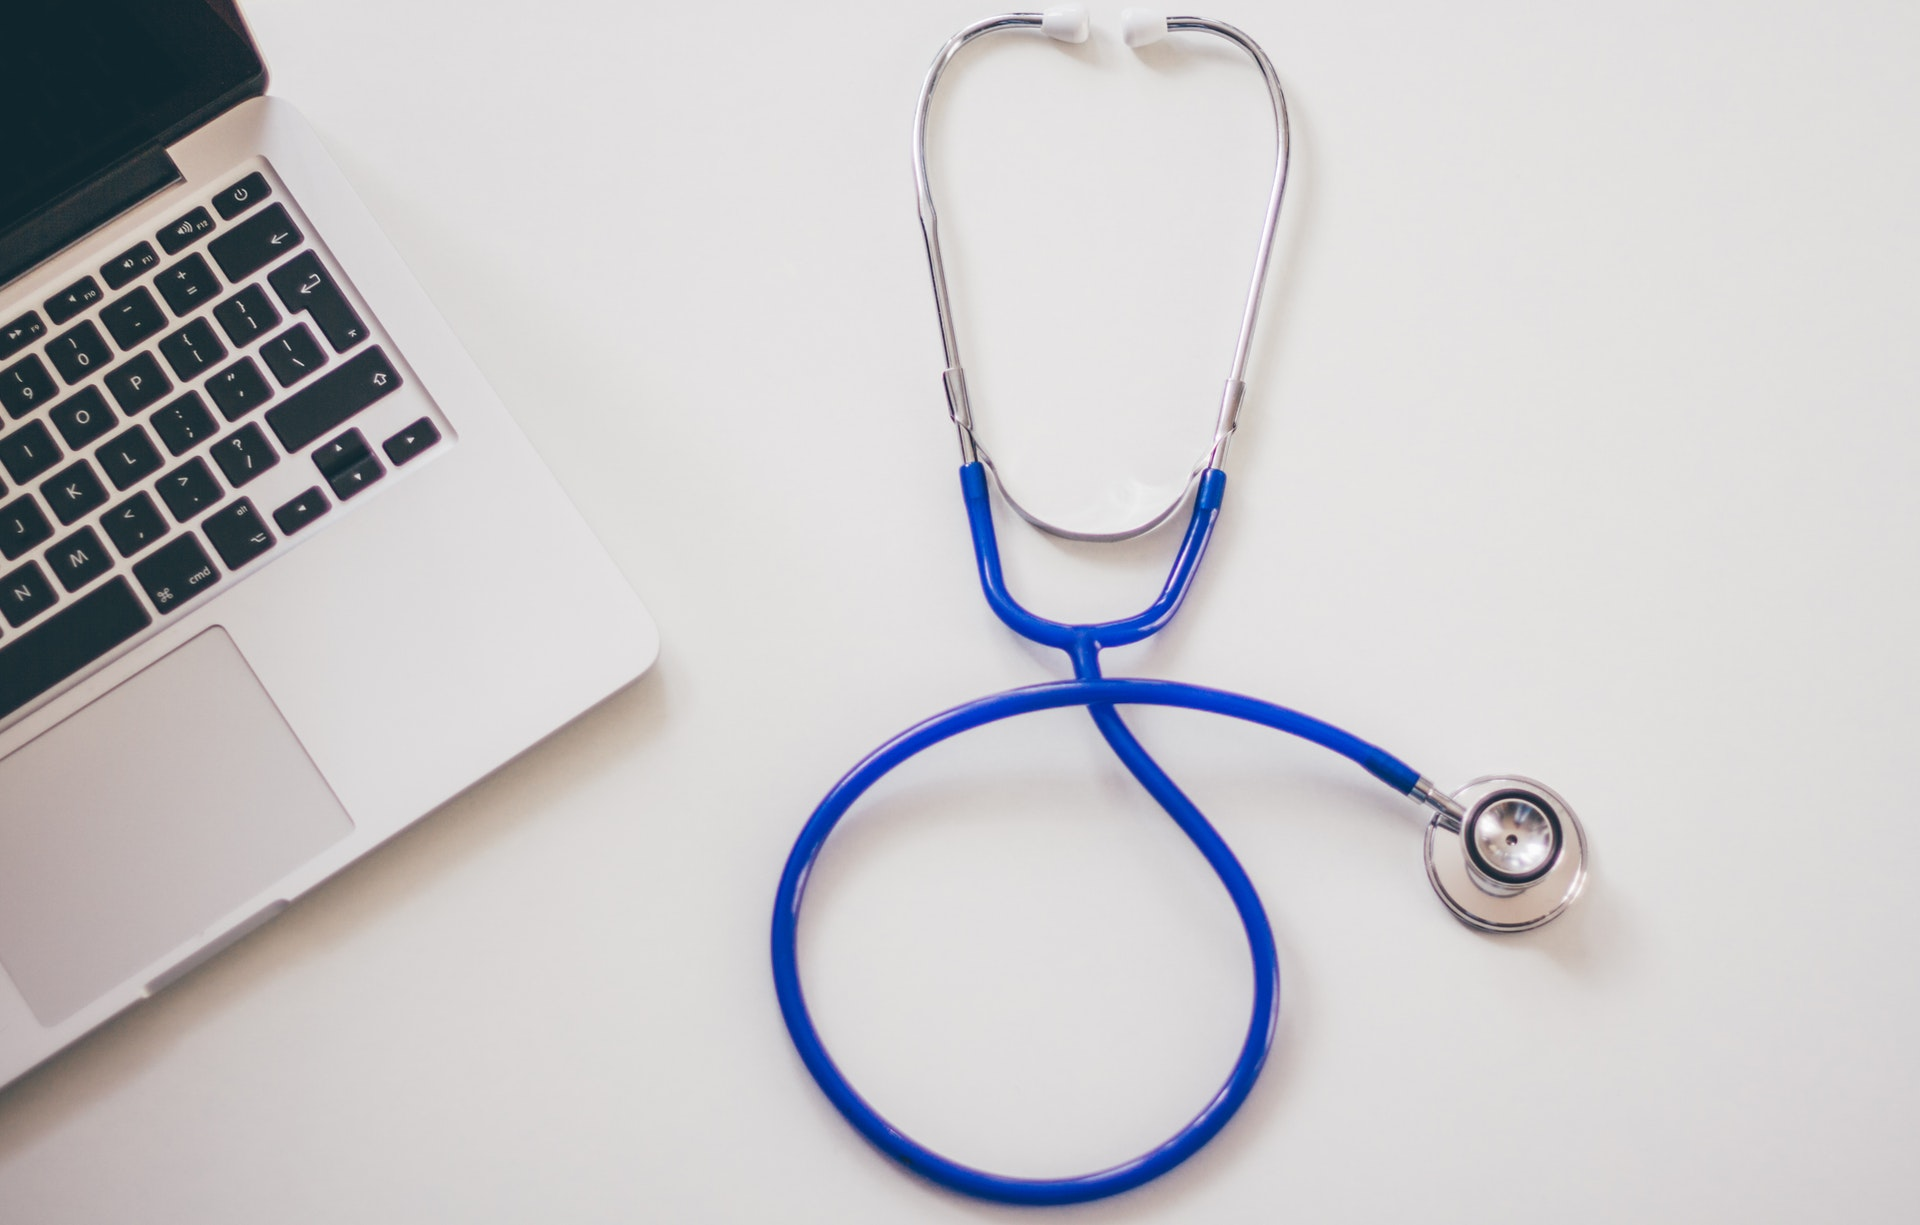

# **Neural Network Classification**
In this project, implementing a neural network for a medical diagnosis is studied.

## Import the TensorFlow
First let's call the TensorFlow,

In [ ]:
# Run on TensorFlow 2.x
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## Import relevant modules
Then, we need to import some necessary modules for data preparation, computation, plotting, etc.

In [ ]:
#Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns

# The following lines adjust the granularity of reporting.
pd.options.display.float_format = "{:.1f}".format

print("Imported modules.")

Imported modules.


## Load the dataset
Here we need to load the dataset.

In [ ]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()
dataset= pd.DataFrame(df['data'], columns=df['feature_names'])
dataset['target']= df['target']
dataset.columns = dataset.columns.str.replace(' ', '_')

We can also have a glimpse into the dataset,

In [ ]:
dataset.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,18.0,10.4,122.8,1001.0,0.1,0.3,0.3,0.1,0.2,0.1,...,17.3,184.6,2019.0,0.2,0.7,0.7,0.3,0.5,0.1,0
1,20.6,17.8,132.9,1326.0,0.1,0.1,0.1,0.1,0.2,0.1,...,23.4,158.8,1956.0,0.1,0.2,0.2,0.2,0.3,0.1,0
2,19.7,21.2,130.0,1203.0,0.1,0.2,0.2,0.1,0.2,0.1,...,25.5,152.5,1709.0,0.1,0.4,0.5,0.2,0.4,0.1,0
3,11.4,20.4,77.6,386.1,0.1,0.3,0.2,0.1,0.3,0.1,...,26.5,98.9,567.7,0.2,0.9,0.7,0.3,0.7,0.2,0
4,20.3,14.3,135.1,1297.0,0.1,0.1,0.2,0.1,0.2,0.1,...,16.7,152.2,1575.0,0.1,0.2,0.4,0.2,0.2,0.1,0


The statistics of the dataset such as the number of examples, mean value for each feature, etc. can be obtained as well,

In [ ]:
dataset.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
count,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,...,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0
mean,14.1,19.3,92.0,654.9,0.1,0.1,0.1,0.0,0.2,0.1,...,25.7,107.3,880.6,0.1,0.3,0.3,0.1,0.3,0.1,0.6
std,3.5,4.3,24.3,351.9,0.0,0.1,0.1,0.0,0.0,0.0,...,6.1,33.6,569.4,0.0,0.2,0.2,0.1,0.1,0.0,0.5
min,7.0,9.7,43.8,143.5,0.1,0.0,0.0,0.0,0.1,0.0,...,12.0,50.4,185.2,0.1,0.0,0.0,0.0,0.2,0.1,0.0
25%,11.7,16.2,75.2,420.3,0.1,0.1,0.0,0.0,0.2,0.1,...,21.1,84.1,515.3,0.1,0.1,0.1,0.1,0.3,0.1,0.0
50%,13.4,18.8,86.2,551.1,0.1,0.1,0.1,0.0,0.2,0.1,...,25.4,97.7,686.5,0.1,0.2,0.2,0.1,0.3,0.1,1.0
75%,15.8,21.8,104.1,782.7,0.1,0.1,0.1,0.1,0.2,0.1,...,29.7,125.4,1084.0,0.1,0.3,0.4,0.2,0.3,0.1,1.0
max,28.1,39.3,188.5,2501.0,0.2,0.3,0.4,0.2,0.3,0.1,...,49.5,251.2,4254.0,0.2,1.1,1.3,0.3,0.7,0.2,1.0


The correlation between different features and the target (label) is often a good way to establish some understanding about the dataset.

**Question 1:**
Show the correlation among the attributes in the dataset. Then, find the **four** features with the highest correlations to the target.

Correlation Matrix:
                         mean_radius  mean_texture  mean_perimeter  mean_area  \
mean_radius                      1.0           0.3             1.0        1.0   
mean_texture                     0.3           1.0             0.3        0.3   
mean_perimeter                   1.0           0.3             1.0        1.0   
mean_area                        1.0           0.3             1.0        1.0   
mean_smoothness                  0.2          -0.0             0.2        0.2   
mean_compactness                 0.5           0.2             0.6        0.5   
mean_concavity                   0.7           0.3             0.7        0.7   
mean_concave_points              0.8           0.3             0.9        0.8   
mean_symmetry                    0.1           0.1             0.2        0.2   
mean_fractal_dimension          -0.3          -0.1            -0.3       -0.3   
radius_error                     0.7           0.3             0.7        0.7   
texture_

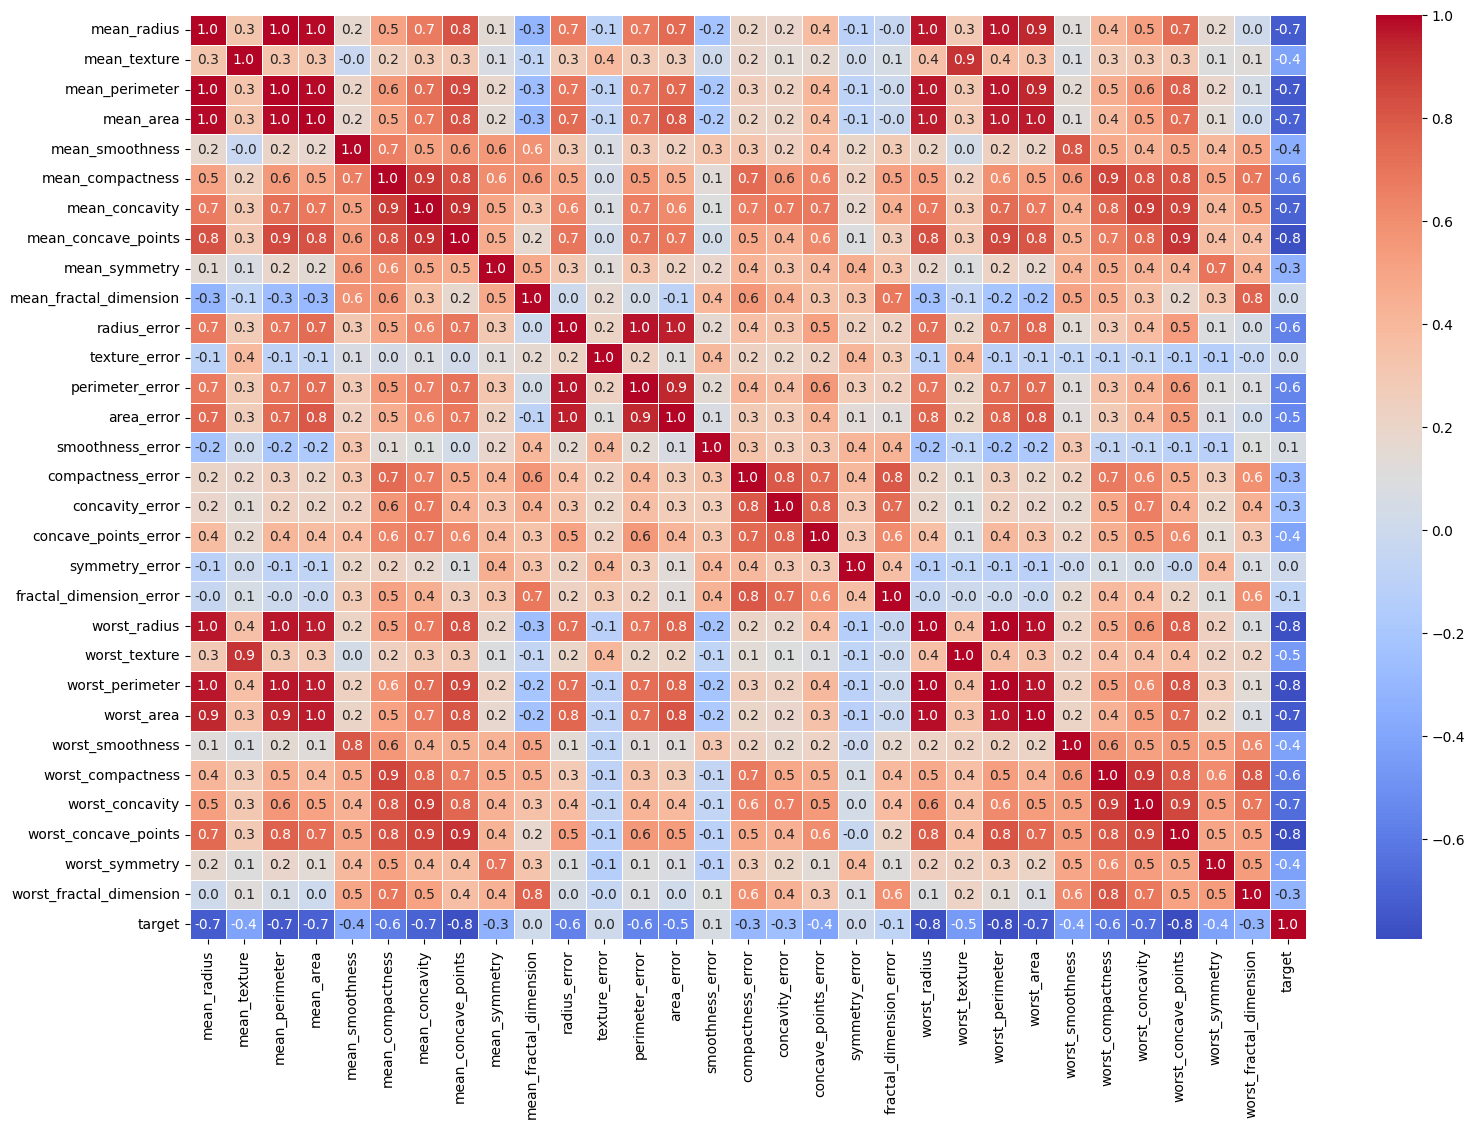

In [ ]:
# Generate a correlation matrix.
# Write your code between the lines (~ 1 line)
#################################################
correlation_matrix = dataset.corr()

highest = correlation_matrix['target'].abs().nlargest(5)[1:]

print("Correlation Matrix:")
print(correlation_matrix)
print("\nFour features with highest correlation to the target:")
print(highest)

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5, annot_kws={"size": 10})
plt.show()
#################################################

## Separate input features and targets
Here the dataset will be split into the input features and the output target. For the input features, select the top 4 features with highest correlations to the target (from the previous question).



**Question 2:**
Split the datset into the input features (`X_dataset`) and the output target (`y_dataset`).

In [ ]:
# Split the dataset into input features and the output target.
# Write your code between the lines (~ 2 line)
#################################################
y_dataset = dataset.pop('target')
X_dataset = X_dataset = dataset[['worst_concave_points', 'worst_perimeter', 'mean_concave_points', 'worst_radius']]
#################################################

## Normalize values
As in the previous project, the values of different features should range roughly similar. Therefore, normalizing the input features might be a necessary step before building the model. Here we calculate the Z-score for each input feature column.

**Question 3:** Find the normalized input features.

In [ ]:
# Convert raw values to their Z-scores
# Calculate the Z-scores of each input feature column.
# Write your code between the lines (~ 3 lines)
#################################################
X_dataset_mean = X_dataset.mean()
X_dataset_std = X_dataset.std()
X_dataset_norm = (X_dataset - X_dataset_mean) / X_dataset_std
#################################################
print("Dataset normalized.")

Dataset normalized.


## Split the dataset
At this stage, we should split the dataset into the training set and the validation/test set. Therefore, we would have input features and their corresponding targets both for training and validation/test sets.

**Question 4:**
Split the dataset into the training set (80%) and validation/test set (20%). Make sure that the random state is set to 100 or `random_state=100` for reproducibility.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into the training set (80%) and the test set (20%).
# Write your code between the lines (~ 1 line)
#################################################
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_dataset_norm, y_dataset, test_size=0.2, random_state=100)
#################################################
print("Dataset split.")

Dataset split.


## Define a logistic regression model as a baseline
A logistic regression model can be used as the baseline. Here we define and train a logistic regression model.

**Question 5:** Train the initialized model using the training data.

In [ ]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression()

# Train the model using the training data
# Write your code between the lines (~ 1 line)
#################################################
model_LR.fit(X_train_norm, y_train)
#################################################

y_predict_LR = model_LR.predict(X_test_norm)

**Question 6:**
After training, evaluate the performance of the logistic regression model against the test set. To do so, run the following cell and report the accuracy.

In [ ]:
# Evaluate the trained model against the test set.
from sklearn.metrics import accuracy_score

print("\n Evaluate the logistic regression model against the test set:", accuracy_score(y_predict_LR, y_test))
# accuracy_score(y_predict_LR, y_test)

print("\n train:", accuracy_score(model_LR.predict(X_train_norm), y_train))


 Evaluate the logistic regression model against the test set: 0.9473684210526315

 train 0.9428571428571428


## Define a neural network model
In here, we define a neural network model by specifying the number of layers, nodes, and activation functions.

**Question 7:**
Complete the code and define a neural network with two more hidden layers with 8 and 6 nodes. Set the `activation` function for the hidden layers as relu and the `kernel_regularizer` as `l2` with `l=0.001`.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# find the number of input features
n_features = X_train_norm.shape[1]


# Create the neural network
model_NN = tf.keras.Sequential([
    layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.001), input_shape=(n_features,)),
    # Write your code between the lines (~ 2 lines)
    #################################################
    layers.Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.001)),
    layers.Dense(6, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.001)),
    #################################################
    layers.Dense(1, activation='sigmoid')
])


## Train the neural network model
Finally, the neural network model should be compiled and trained using the training data. Here we set the optimization algorithm, loss function, the number of epochs for training the model.

**Question 8:** Train the neural network model (set `epochs` to 100).

In [ ]:
# compile the model
model_NN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

# fit the model
# Write your code between the lines (~ 1 line)
#################################################
model_NN.fit(X_train_norm, y_train, epochs=100)
#################################################

Epoch 1/100
15/15 [==============================] - 2s 11ms/step - loss: 0.6572 - binary_accuracy: 0.6747
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 0.6145 - binary_accuracy: 0.9121
Epoch 3/100
15/15 [==============================] - 0s 7ms/step - loss: 0.5725 - binary_accuracy: 0.9143
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5238 - binary_accuracy: 0.9231
Epoch 5/100
15/15 [==============================] - 0s 9ms/step - loss: 0.4726 - binary_accuracy: 0.9297
Epoch 6/100
15/15 [==============================] - 0s 14ms/step - loss: 0.4210 - binary_accuracy: 0.9319
Epoch 7/100
15/15 [==============================] - 0s 8ms/step - loss: 0.3709 - binary_accuracy: 0.9385
Epoch 8/100
15/15 [==============================] - 0s 11ms/step - loss: 0.3248 - binary_accuracy: 0.9407
Epoch 9/100
15/15 [==============================] - 0s 10ms/step - loss: 0.2862 - binary_accuracy: 0.9407
Epoch 10/100
15/15 [======================

**Question 9:**
Evaluate the performance of the neural network model against the test set. To do so, run the following cell and report the accuracy.

In [ ]:
# Evaluate the trained model against the test set.
print("\n Evaluate the neural network model against the test set:")
model_NN.evaluate(x = X_test_norm, y = y_test)

model_NN.evaluate(x=X_train_norm, y=y_train)


 Evaluate the neural network model against the test set:
15/15 [==============================] - 0s 2ms/step - loss: 0.1432 - binary_accuracy: 0.9429


[0.14323273301124573, 0.9428571462631226]

**Question 10:**
Which model did perform better against the test set in predicting the output. Moreover, is there any overfitting observed for the neural network? Finally, is there any significant improvement using the more complex model? Motivate your answer.

## Optional hints
If you need assistance, you may click on the cell below to see the hints for each question.

In [ ]:
#@title Hints

# Question 1: Use the pandas command "DataFrame.corr()".
# For more information:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

# Question 2: To separate the last column (target) of the dataset, you can use
# the pandas command "DataFrame.pop(item)".
# For more information:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pop.html
# Furthermore, select the input features for X_dataset using the names of the
# columns for the respective features from dataset.

# Question 3: The formula for z.score normalization is
# "z-score = (dataset - dataset_mean)/dataset_standard_deviation".
# To find the mean value use the pandas command "DataFrame.mean()" and
# to find the standard deviation use the pandas command "DataFrame.std()".
# For more information:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html

# Question 4: To split the dataset into the training set and the test set, you
# can use the sklearn command "sklearn.model_selection.train_test_split(...)".
# Make sure that the random state is set as "random_state=100".
# For more information:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# Question 5: You can train the model using "fit" function.
# For more information:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit

# Question 6: Self-explanatory!

# Question 7: You need to add two more hidden layers to your neural network model.
# It would be very similar to the provided first hidden layer. Only remember to
# set the number of units to 8 for the second hidden layer and 6 for the third
# hidden layer. Also set the activation functions to "relu" and implement the
# regularization term exactly as the first hidden layer.
# For more information:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

# Question 8: Use the fit function to train the model.
# For more information:
# https://keras.io/api/models/model_training_apis/

# Question 9: Self-explanatory!

# Question 10: The comparison between performance of the two models (i.e. the linear
# regression and the neural network) is simply done based on the evaluations on
# the test set. Furthermore, to check the overfitting, compare the mean squared
# error on the training set vs the mean squared error against the test set for
# the model.

# Best of luck!
